In [1]:
# Importando as bibliotecas para manipulação de dados

import pandas as pd
import json

In [2]:
# Função para identificar o tipo de arquivo JSON

def identificar_tipo_json(json_data):
    if isinstance(json_data, list):
        return "lista"
    elif isinstance(json_data, dict):
        return "dicionario"
    else:
        return "outro"

In [3]:
with open("applicants.json", encoding="utf-8") as f:
    dados = json.load(f)

tipo = identificar_tipo_json(dados)
print(f"Tipo identificado: {tipo}")

Tipo identificado: dicionario


In [4]:
with open("prospects.json", encoding="utf-8") as f:
    dados = json.load(f)

tipo = identificar_tipo_json(dados)
print(f"Tipo identificado: {tipo}")

Tipo identificado: dicionario


In [5]:
with open("vagas.json", encoding="utf-8") as f:
    dados = json.load(f)

tipo = identificar_tipo_json(dados)
print(f"Tipo identificado: {tipo}")

Tipo identificado: dicionario


In [6]:
# Função para normalizar JSON

def normalizar_json(caminho):
    with open(caminho, 'r', encoding='utf-8') as f:
        dados = json.load(f)

    if isinstance(dados, list):
        return pd.json_normalize(dados)

    if isinstance(dados, dict):
        objetos = [
            {
                'id': id_obj,
                **{
                    f"{cat}.{key}" if isinstance(conteudo, dict) else cat: valor
                    for cat, conteudo in info.items()
                    for key, valor in (conteudo.items() if isinstance(conteudo, dict) else [(None, conteudo)])
                }
            }
            for id_obj, info in dados.items()
        ]
        return pd.DataFrame(objetos)

    raise TypeError("Erro ao normalizar")

In [7]:
# Arquivos normalizados e armazenados em DataFrames

df_applicants = normalizar_json("applicants.json")
df_prospects = normalizar_json("prospects.json")
df_vagas = normalizar_json("vagas.json")

In [8]:
df_applicants.head()

,id,infos_basicas.telefone_recado,infos_basicas.telefone,infos_basicas.objetivo_profissional,infos_basicas.data_criacao,infos_basicas.inserido_por,infos_basicas.email,infos_basicas.local,infos_basicas.sabendo_de_nos_por,infos_basicas.data_atualizacao,...,cargo_atual.id_ibrati,cargo_atual.email_corporativo,cargo_atual.cargo_atual,cargo_atual.projeto_atual,cargo_atual.cliente,cargo_atual.unidade,cargo_atual.data_admissao,cargo_atual.data_ultima_promocao,cargo_atual.nome_superior_imediato,cargo_atual.email_superior_imediato
0,31000,,(11) 97048-2708,,10-11-2021 07:29:49,Luna Correia,carolina_aparecida@gmail.com,,,10-11-2021 07:29:49,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,31001,,(11) 93723-4396,Analista Administrativo,10-11-2021 08:56:16,Laura Pacheco,eduardo_rios@hotmail.com,"São Paulo, São Paulo",Outros,11-11-2021 11:10:31,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,31002,,(11) 92399-9824,Administrativo | Financeiro,10-11-2021 09:01:00,Laura Pacheco,pedro_henrique_carvalho@gmail.com,"São Paulo, São Paulo",Anúncio,10-11-2021 11:42:36,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,31003,,(11) 98100-1727,Área administrativa,10-11-2021 09:08:13,Laura Pacheco,thiago_barbosa@hotmail.com,"São Paulo, São Paulo",Site de Empregos,10-11-2021 16:04:51,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,31004,,(11) 92517-2678,,10-11-2021 09:18:46,Maria Clara Pires,diogo_das_neves@hotmail.com,,,10-11-2021 09:22:03,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [9]:
df_prospects.head()

,id,titulo,modalidade,prospects
0,4530,CONSULTOR CONTROL M,,"[{'nome': 'José Vieira', 'codigo': '25632', 's..."
1,4531,2021-2607395-PeopleSoft Application Engine-Dom...,,"[{'nome': 'Sra. Yasmin Fernandes', 'codigo': '..."
2,4532,,,[]
3,4533,2021-2605708-Microfocus Application Life Cycle...,,"[{'nome': 'Arthur Almeida', 'codigo': '26338',..."
4,4534,2021-2605711-Microfocus QTP - UFT Automation T...,,"[{'nome': 'Ana Luiza Vieira', 'codigo': '26361..."


In [10]:
df_vagas.head()

,id,informacoes_basicas.data_requicisao,informacoes_basicas.limite_esperado_para_contratacao,informacoes_basicas.titulo_vaga,informacoes_basicas.vaga_sap,informacoes_basicas.cliente,informacoes_basicas.solicitante_cliente,informacoes_basicas.empresa_divisao,informacoes_basicas.requisitante,informacoes_basicas.analista_responsavel,...,perfil_vaga.demais_observacoes,perfil_vaga.viagens_requeridas,perfil_vaga.equipamentos_necessarios,beneficios.valor_venda,beneficios.valor_compra_1,beneficios.valor_compra_2,informacoes_basicas.data_inicial,informacoes_basicas.data_final,perfil_vaga.habilidades_comportamentais_necessarias,informacoes_basicas.nome_substituto
0,5185,04-05-2021,00-00-0000,Operation Lead -,Não,"Morris, Moran and Dodson",Dra. Catarina Marques,Decision São Paulo,Maria Laura Nogueira,Srta. Bella Ferreira,...,100% Remoto Período – entre 5 – 6 meses,,Nenhum -,-,R$,,NaN,NaN,NaN,NaN
1,5184,04-05-2021,00-00-0000,Consultor PP/QM Sênior,Não,"Morris, Moran and Dodson",Dra. Catarina Marques,Decision São Paulo,Maria Laura Nogueira,Yasmin da Rosa,...,• Início: Imediato • Fim: Jan/22,,Nenhum -,-,R$,,NaN,NaN,NaN,NaN
2,5183,04-05-2021,00-00-0000,ANALISTA PL/JR C/ SQL,Não,"Morris, Moran and Dodson",Dra. Catarina Marques,Decision São Paulo,Maria Laura Nogueira,Ana Albuquerque,...,Localização: Remoto Perfil: Analista Pleno ou ...,,Nenhum -,-,R$,,NaN,NaN,NaN,NaN
3,5182,04-05-2021,18-05-2021,Technical Architect - 11894809,Não,Nelson-Page,Dr. Raul Monteiro,Decision São Paulo,Cecília Freitas,Clara Rios,...,Budgeted Rate - indicate currency and type (ho...,Não,Notebook padrão -,- p/ mês (168h),fechado,,18-05-2021,17-01-2022,NaN,NaN
4,5181,04-05-2021,00-00-0000,Consultor SAP AUTHORIZATION (BCA) -Pleno / Sênior,Não,Mann and Sons,Cauê Fogaça,Decision São Paulo,Maria Laura Nogueira,Srta. Bella Ferreira,...,contratação CLT full pela Decision locação rem...,Sim,Nenhum -,-,R$,,NaN,NaN,NaN,NaN


In [11]:
# Função para expandir a lista da coluna prospects

def expandir_lista_de_prospects(df_prospects):
    linhas_expandidas = []

    for _, linha in df_prospects.iterrows():
        lista_prospects = linha.get('prospects', [])
        if isinstance(lista_prospects, list):
            for prospect in lista_prospects:
                nova_linha = prospect.copy()
                nova_linha['id_vaga'] = linha.get('id')
                nova_linha['titulo_vaga'] = linha.get('titulo')
                nova_linha['modalidade'] = linha.get('modalidade')
                linhas_expandidas.append(nova_linha)

    return pd.DataFrame(linhas_expandidas)

In [12]:
df_prospects = expandir_lista_de_prospects(df_prospects)
df_prospects.head()

,nome,codigo,situacao_candidado,data_candidatura,ultima_atualizacao,comentario,recrutador,id_vaga,titulo_vaga,modalidade
0,José Vieira,25632,Encaminhado ao Requisitante,25-03-2021,25-03-2021,"Encaminhado para - PJ R$ 72,00/hora",Ana Lívia Moreira,4530,CONSULTOR CONTROL M,
1,Srta. Isabela Cavalcante,25529,Encaminhado ao Requisitante,22-03-2021,23-03-2021,"encaminhado para - R$ 6.000,00 – CLT Full , n...",Ana Lívia Moreira,4530,CONSULTOR CONTROL M,
2,Sra. Yasmin Fernandes,25364,Contratado pela Decision,17-03-2021,12-04-2021,Data de Inicio: 12/04/2021,Juliana Cassiano,4531,2021-2607395-PeopleSoft Application Engine-Dom...,
3,Alexia Barbosa,25360,Encaminhado ao Requisitante,17-03-2021,17-03-2021,,Juliana Cassiano,4531,2021-2607395-PeopleSoft Application Engine-Dom...,
4,Arthur Almeida,26338,Contratado pela Decision,29-04-2021,18-05-2021,,Stella Vieira,4533,2021-2605708-Microfocus Application Life Cycle...,


In [13]:
# Criação de coluna status_candidato para ser utilizado na análise

df_prospects['status_candidato'] = df_prospects['situacao_candidado'].apply(lambda x: 1 if isinstance(x, str) and ('encaminhado' in x.lower() or 'contratado' in x.lower()) else 0)

In [14]:
# Importando bibliotecas para a analise exploratoria dos dados

from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.cluster import KMeans
from sklearn.decomposition import PCA

In [15]:
# Estabecimento da seed
RANDOM_SEED = 99

In [16]:
# Função para preparar os dados para a clusterização

def preparar_dados_clustering(df):
    atributos = ['formacao_e_idiomas.nivel_ingles', 'formacao_e_idiomas.nivel_espanhol', 'formacao_e_idiomas.nivel_academico', 'informacoes_profissionais.nivel_profissional', 'informacoes_profissionais.area_atuacao']
    df_cluster = df[atributos].fillna('desconhecido')
    for col in atributos:
        df_cluster[col] = LabelEncoder().fit_transform(df_cluster[col])
    return StandardScaler().fit_transform(df_cluster)

dados_numericos = preparar_dados_clustering(df_applicants)

In [17]:
# Aplicando KMeans para clusterização

modelo_kmeans = KMeans(n_clusters=4, random_state=RANDOM_SEED)
clusters = modelo_kmeans.fit_predict(dados_numericos)

pca = PCA(n_components=2, random_state=RANDOM_SEED)
componentes_pca = pca.fit_transform(dados_numericos)

df_applicants['cluster'] = clusters
df_applicants['PCA_1'] = componentes_pca[:, 0]
df_applicants['PCA_2'] = componentes_pca[:, 1]

In [18]:
# Unindo os DataFrames para o modelo supervisionado

df_prospects = df_prospects.merge(df_vagas[['id', 'perfil_vaga.estado']], left_on='id_vaga', right_on='id', how='left')
df_merged = df_prospects.merge(df_applicants, left_on='codigo', right_on='infos_basicas.codigo_profissional', how='left')

In [19]:
# Importando bibliotecas para o modelo supervisionado

from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_auc_score, confusion_matrix
from sklearn.model_selection import cross_val_score

In [20]:
# Seleção de features para execução do modelo supervisionado

features = ['formacao_e_idiomas.nivel_ingles', 'formacao_e_idiomas.nivel_espanhol', 'formacao_e_idiomas.nivel_academico', 'informacoes_profissionais.nivel_profissional', 'informacoes_profissionais.area_atuacao', 'perfil_vaga.estado']

df_model = df_merged[features + ['status_candidato']].fillna('desconhecido')
for col in features:
    df_model[col] = LabelEncoder().fit_transform(df_model[col])

X = df_model[features]
y = df_model['status_candidato']

modelo_rf = RandomForestClassifier(n_estimators=100, random_state=RANDOM_SEED)
modelo_rf.fit(X, y)

RandomForestClassifier(random_state=99)

In [21]:
# Importando bibliotecas para visualização

import matplotlib.pyplot as plt
import seaborn as sns

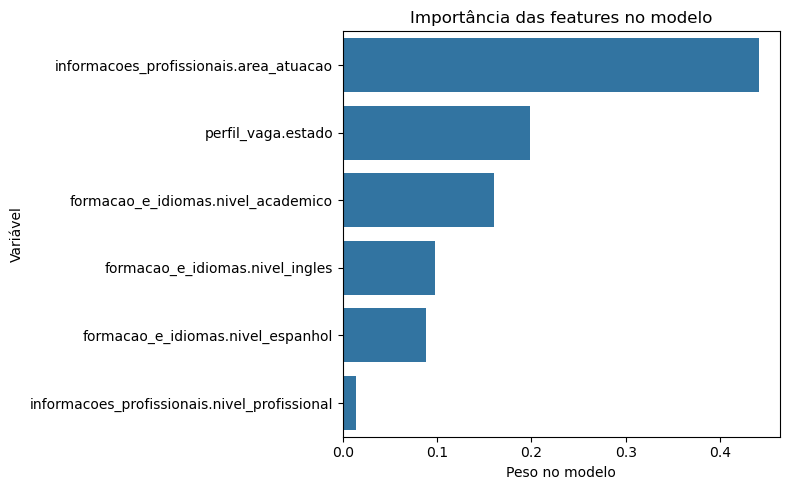

In [22]:
# Verificando a importância das features no modelo

importancias = modelo_rf.feature_importances_

df_importancias = pd.DataFrame({"Variável": X.columns, "Importância": importancias}).sort_values(by="Importância", ascending=False)

plt.figure(figsize=(8, 5))
sns.barplot(x="Importância", y="Variável", data=df_importancias)
plt.title("Importância das features no modelo")
plt.xlabel("Peso no modelo")
plt.ylabel("Variável")
plt.tight_layout()
plt.show()

Acurácia: 0.67
Precisão: 0.72
Recall: 0.12
F1 Score: 0.2


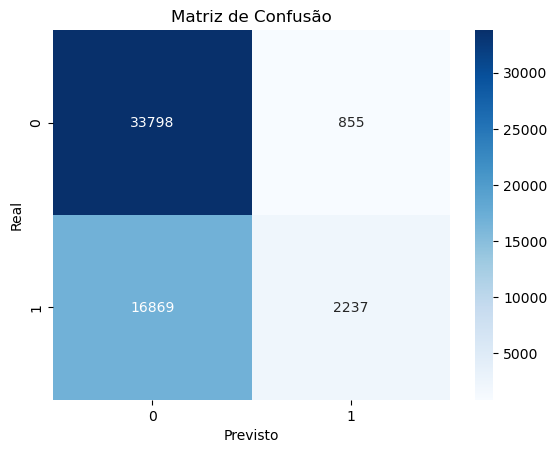

In [23]:
# Avaliação do modelo

y_pred = modelo_rf.predict(X)

print("Acurácia:", round(accuracy_score(y, y_pred), 2))
print("Precisão:", round(precision_score(y, y_pred), 2))
print("Recall:", round(recall_score(y, y_pred), 2))
print("F1 Score:", round(f1_score(y, y_pred), 2))

matriz = confusion_matrix(y, y_pred)
sns.heatmap(matriz, annot=True, fmt='d', cmap='Blues')
plt.title("Matriz de Confusão")
plt.xlabel("Previsto")
plt.ylabel("Real")
plt.show()

In [24]:
# Ajustando o modelo para lidar com a classe minoritária

modelo_rf_v2 = RandomForestClassifier(n_estimators=100, random_state=RANDOM_SEED, class_weight='balanced')
modelo_rf_v2.fit(X, y)

RandomForestClassifier(class_weight='balanced', random_state=99)

In [25]:
# Avaliação do modelo ajustado

y_pred_v2 = modelo_rf_v2.predict(X)
y_proba_v2 = modelo_rf_v2.predict_proba(X)[:, 1]

print("Acurácia:", round(accuracy_score(y, y_pred_v2), 2))
print("Precisão:", round(precision_score(y, y_pred_v2), 2))
print("Recall:  ", round(recall_score(y, y_pred_v2), 2))
print("F1 Score:", round(f1_score(y, y_pred_v2), 2))
print("ROC AUC :", round(roc_auc_score(y, y_proba_v2), 2))

Acurácia: 0.51
Precisão: 0.4
Recall:   0.78
F1 Score: 0.53
ROC AUC : 0.62


In [26]:
# Ajustando o threshold para melhorar a precisão e recall

threshold = 0.35
y_pred_custom_v2 = (y_proba_v2 >= threshold).astype(int)

print("Threshold ajustado")
print("Precisão:", round(precision_score(y, y_pred_custom_v2), 2))
print("Recall:  ", round(recall_score(y, y_pred_custom_v2), 2))
print("F1 Score:", round(f1_score(y, y_pred_custom_v2), 2))

Threshold ajustado
Precisão: 0.38
Recall:   0.98
F1 Score: 0.55


In [27]:
# Ajustando o hiperparâmetros do modelo
 
modelo_rf_v3 = RandomForestClassifier(n_estimators=300, max_depth=12, min_samples_split=5, min_samples_leaf=3, max_features='sqrt', class_weight='balanced', random_state=RANDOM_SEED)
modelo_rf_v3.fit(X, y)

RandomForestClassifier(class_weight='balanced', max_depth=12,
                       min_samples_leaf=3, min_samples_split=5,
                       n_estimators=300, random_state=99)

In [28]:
# Avaliação do modelo V3 com hiperparâmetros ajustados

y_pred_v3 = modelo_rf_v3.predict(X)
y_proba_v3 = modelo_rf_v3.predict_proba(X)[:, 1]

print("Acurácia:", round(accuracy_score(y, y_pred_v3), 2))
print("Precisão:", round(precision_score(y, y_pred_v3), 2))
print("Recall:  ", round(recall_score(y, y_pred_v3), 2))
print("F1 Score:", round(f1_score(y, y_pred_v3), 2))
print("ROC AUC :", round(roc_auc_score(y, y_proba_v3), 2))

Acurácia: 0.5
Precisão: 0.39
Recall:   0.73
F1 Score: 0.51
ROC AUC : 0.58


In [29]:
# Teste com threshold ajustado

threshold_v3 = 0.35
y_pred_custom_v3 = (y_proba_v3 >= threshold_v3).astype(int)

print("Avaliação com threshold")
print("Precisão:", round(precision_score(y, y_pred_custom_v3), 2))
print("Recall:  ", round(recall_score(y, y_pred_custom_v3), 2))
print("F1 Score:", round(f1_score(y, y_pred_custom_v3), 2))

Avaliação com threshold
Precisão: 0.37
Recall:   0.99
F1 Score: 0.53


In [30]:
# Importação da biblioteca para salvar o modelo

import joblib

In [31]:
# Salvando o modelo treinado

joblib.dump(modelo_rf_v3, "modelo_rf_v3.pkl")

['modelo_rf_v3.pkl']

In [32]:
# Exportando os resultados para CSV

df_prospects['score_contratacao_v3'] = y_proba_v3
df_export_v3 = df_prospects[['codigo', 'nome', 'score_contratacao_v3', 'titulo_vaga', 'modalidade']]
df_export_v3.to_csv("scores_contratacao_v3.csv", index=False)